In [1]:
 %matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs) 

Text(0,0.5,'Magnitud')

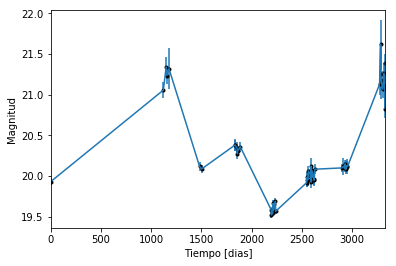

In [2]:
data = np.genfromtxt('LC_18344_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

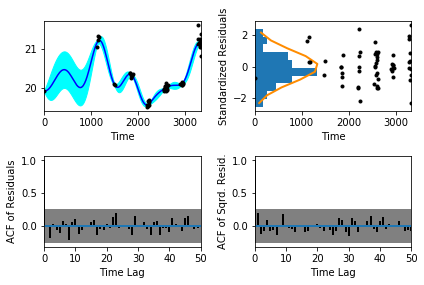

In [5]:
sample.assess_fit()

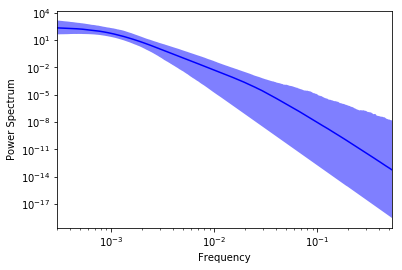

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000375271,0.861746,'Medida del nivel de ruido')

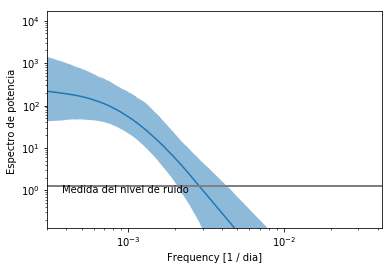

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

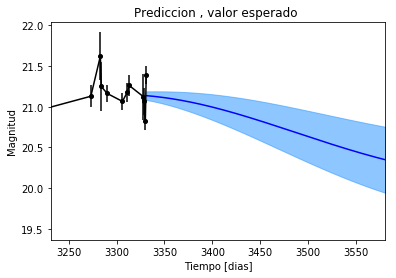

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

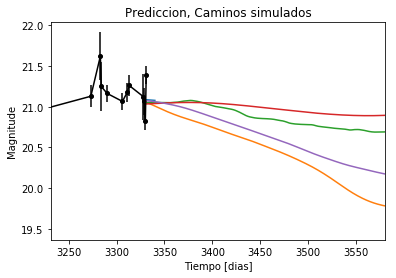

In [10]:
predict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')


/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


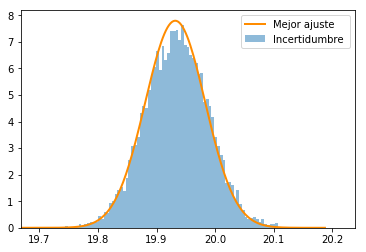

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

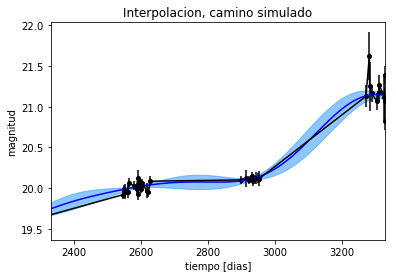

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

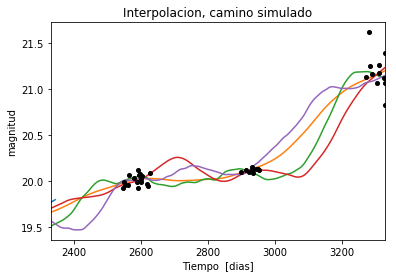

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

Plotting parameter summary


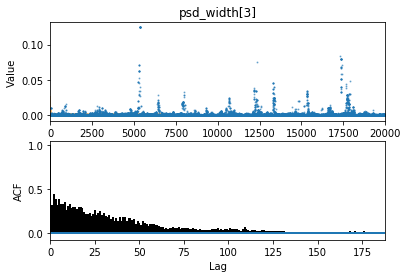

In [15]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [16]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 478.601993823
Median: 0.00301003125768
Standard deviation: 0.177140897348
68% credibility interval: [ 0.00050286  0.09763355]
95% credibility interval: [  3.24963465e-04   6.97252095e-01]
99% credibility interval: [  3.03704149e-04   1.02626891e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 812.599453101
Median: 0.000838868955732
Standard deviation: 0.0665830803564
68% credibility interval: [ 0.00040196  0.00790278]
95% credibility interval: [ 0.00031521  0.18668115]
99% credibility interval: [  3.02411055e-04   4.84654543e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 493.31167709
Median: 0.00700998644376
Standar

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 690.059975725
Median: 0.000808611988536
Standard deviation: 0.209244794783
68% credibility interval: [ 0.          0.17191867]
95% credibility interval: [ 0.          0.80798301]
99% credibility interval: [ 0.          1.00090981]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 690.059975725
Median: 0.000808611988536
Standard deviation: 0.209244794783
68% credibility interval: [ 0.          0.17191867]
95% credibility interval: [ 0.          0.80798301]
99% credibility interval: [ 0.          1.00090981]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 298.269553984
Median: 0.0
Standard deviation: 0.00032137637169
68%

Plotting parameter summary


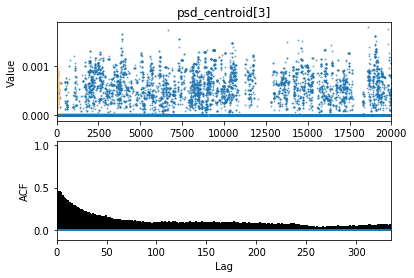

In [20]:
sample.plot_parameter('psd_centroid', 3, doShow=True)

In [21]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2001.78738599
Median: 67.1157424766
Standard deviation: 1.65279534791
68% credibility interval: [ 65.33260555  68.33532425]
95% credibility interval: [ 62.80182945  69.26001352]
99% credibility interval: [ 60.71333556  69.65971651]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 913.959998367
Median: 0.34489344148
Standard deviation: 1.80565723965
68% credibility interval: [ 0.03248211  2.74853993]
95% credibility interval: [ 0.01121672  6.3775013 ]
99% credibility interval: [ 0.00871693  8.4824046 ]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 330.336241755
Median: 0.0552224916228
Standard deviation: 7.15340586734
68% credibility interval: [  2.05802488e-03   2.54065722e+00]
95% credibility interval: [  1.5

Plotting parameter summary


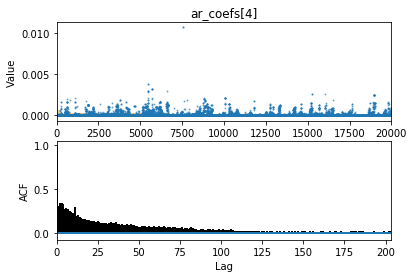

In [25]:
sample.plot_parameter('ar_coefs', 4, doShow=True)

In [26]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [27]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4548.06506722
Median: 7.38584100393e-37
Standard deviation: 1.14999774585e+99
68% credibility interval: [  5.49452853e-108   5.67105346e-004]
95% credibility interval: [  5.01065891e-130   1.36249264e+082]
99% credibility interval: [  4.38001274e-137   5.25421982e+096]


In [28]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [29]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2896.38761742
Median: 20.3184595581
Standard deviation: 0.370601542892
68% credibility interval: [ 20.04501307  20.61407891]
95% credibility interval: [ 19.56181415  21.13166964]
99% credibility interval: [ 19.07630011  21.6180183 ]


Plotting parameter summary


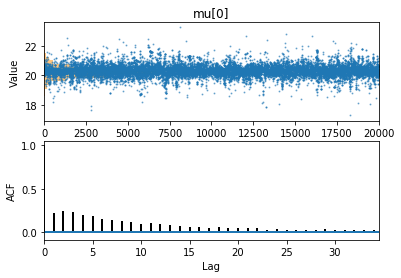

In [30]:
sample.plot_parameter('mu', 0, doShow=True)

In [31]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

Plotting parameter summary


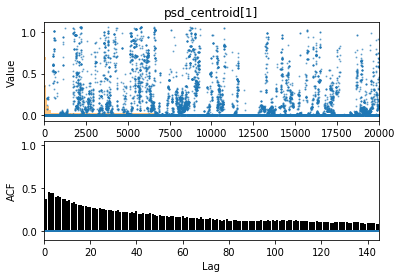

In [32]:
sample.plot_parameter('psd_centroid', 1, doShow=True)

In [33]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [34]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2001.78738599
Median: 67.1157424766
Standard deviation: 1.65279534791
68% credibility interval: [ 65.33260555  68.33532425]
95% credibility interval: [ 62.80182945  69.26001352]
99% credibility interval: [ 60.71333556  69.65971651]


Plotting parameter summary


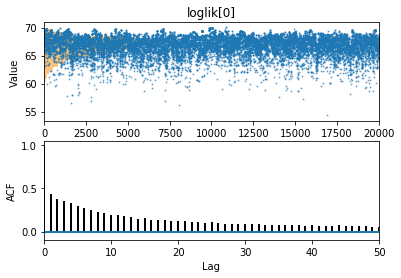

In [35]:
sample.plot_parameter('loglik', 0, doShow=True)

In [36]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [37]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1554.11992929
Median: 0.404977353491
Standard deviation: 0.606288569127
68% credibility interval: [ 0.22801929  0.82865482]
95% credibility interval: [ 0.14593672  2.06197285]
99% credibility interval: [ 0.11641209  3.75225647]


Plotting parameter summary


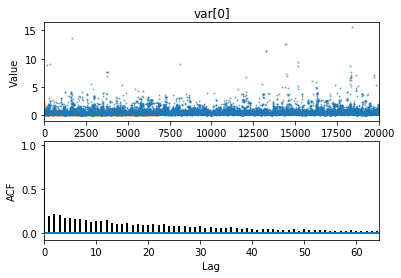

In [38]:
sample.plot_parameter('var', 0, doShow=True)

In [39]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [40]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2141.6538101
Median: 1.03201328106
Standard deviation: 0.157972473099
68% credibility interval: [ 0.88977838  1.19726819]
95% credibility interval: [ 0.78334839  1.39647287]
99% credibility interval: [ 0.72567545  1.5459867 ]


Plotting parameter summary


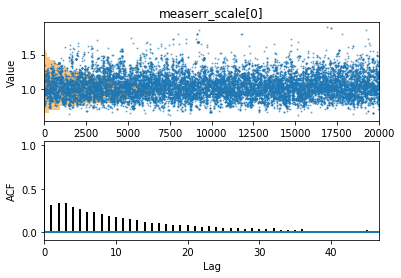

In [41]:
sample.plot_parameter('measerr_scale', 0, doShow=True)

In [42]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [43]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1286.87501207
Median: 1.90244151591e-05
Standard deviation: 0.00363367818444
68% credibility interval: [  2.31534036e-07   1.04383331e-03]
95% credibility interval: [  8.70080558e-86   1.21122019e-02]
99% credibility interval: [  9.68634676e-103   2.18135720e-002]


Plotting parameter summary


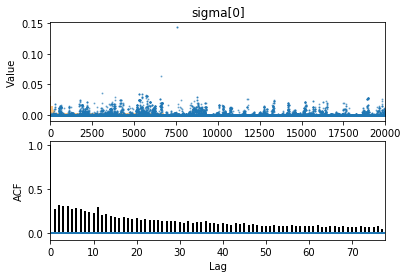

In [44]:
sample.plot_parameter('sigma', 0, doShow=True)

In [45]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [46]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 478.601993823
Median: (-0.0189125841724-0.267277984578j)
Standard deviation: 1.72258176681
68% credibility interval: [-0.61344970-0.59130399j -0.00315958-0.00654506j]
95% credibility interval: [ -4.38096412e+00+0.j         -2.04180567e-03-0.0022383j]
99% credibility interval: [ -6.44823775e+00+0.j          -1.90822945e-03-0.00393719j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 812.599453101
Median: (-0.0052707690973+0.00215948563362j)
Standard deviation: 1.37968063416
68% credibility interval: [-0.04965466+0.15025435j -0.00252558+0.00174025j]
95% credibility interval: [-1.17295225+0.10752213j -0.00198052+0.39847479j]
99% credibility interval: [ -3.04517430e+00+5.23603547j  -1.90010470e-03+0.j        ]
Posterior su